In [ ]:
#upload json file here
#initialise all the random functions to 0
import random
import numpy as np
import tensorflow as tf
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models


In [ ]:
#setup kaggle api to collab
deep=json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME']=deep['username']
os.environ['KAGGLE_KEY']=deep['key']

In [ ]:
#above dara is for setting an environmen tkaggle to collab
import kaggle

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer


Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 98% 64.0M/65.2M [00:03<00:00, 24.5MB/s]
100% 65.2M/65.2M [00:03<00:00, 17.5MB/s]


In [ ]:
ls

emotion-detection-fer.zip  kaggle.json  sample_data/


In [ ]:
#Extract the zip file
f1=ZipFile("emotion-detection-fer.zip")
f1.extractall()
f1.close()

In [ ]:
!ls

emotion-detection-fer.zip  kaggle.json	sample_data  test  train


In [ ]:
base_dir=""
train="/content/train"
test="/content/test"

In [ ]:
ls train


angry/  disgusted/  fearful/  happy/  neutral/  sad/  surprised/


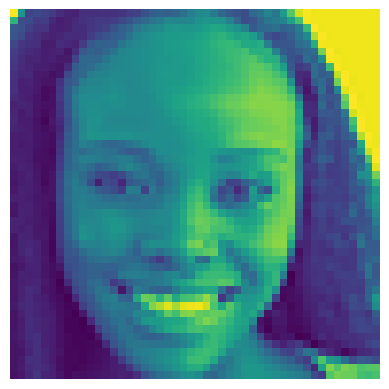

In [ ]:
#SETTING THE BASE DIRECTORY TO COLOR FOLDER
ipath="/content/train/happy/im1001.png"
img=mpimg.imread(ipath)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
img.shape

(48, 48)

In [ ]:
#MAKE ALL IMAGES UNIFORM
img_size=48
batch_size=64
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
#validation split is testinf size
train_generator=data_gen.flow_from_directory(train,target_size=(img_size,img_size),batch_size=batch_size,class_mode="categorical",subset="training")

Found 22968 images belonging to 7 classes.


In [ ]:
#validation split is testinf size
validation_generator=data_gen.flow_from_directory(test,target_size=(img_size,img_size),batch_size=batch_size,class_mode="categorical",subset="training")

Found 5746 images belonging to 7 classes.


In [ ]:
#MAKINH OF NEURAL NETWORK
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(train_generator.num_classes,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 831,399 (3.17 MB)

 Trainable params: 831,399 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

#PASS THE DATA TO MY NETWORK
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=3,
    validation_data=validation_generator,  # Correct argument name
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


358/358 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.3060 - loss: 1.7255 - val_accuracy: 0.4243 - val_loss: 1.5048
Epoch 2/3
  1/358 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3906 - loss: 1.5232

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3906 - loss: 1.5232 - val_accuracy: 0.4298 - val_loss: 1.4916
Epoch 3/3
358/358 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.4445 - loss: 1.4393 - val_accuracy: 0.4647 - val_loss: 1.3774


In [ ]:
model.save("dee.h5")

In [ ]:
#above line is for saving the model
#Extract the classses from data with indexes
deep_classes={v:k for k,v in train_generator.class_indices.items()}
deep_classes

{0: 'angry',
 1: 'disgusted',
 2: 'fearful',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprised'}

In [ ]:
#SAVING key as index and value as disease in above cell
json.dump(deep_classes,open("deep_classes.json","w"))

In [ ]:
ls

dee.h5  deep_classes.json  emotion-detection-fer.zip  kaggle.json  sample_data/  test/  train/


In [ ]:
def load_preprocess_image(ipath,target_size=(224,224)):
  img=Image.open(ipath)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype("float32")/255.
  return img_array

In [ ]:
#above cell is for resizing of image
def predict_disease(model,ipath,class_indices):
  preprocess_img=load_preprocess_image(ipath)
  prediction=model.predict(preprocess_img)
  predicted_class_index=np.argmax(prediction,axis=1)[0]
  predicted_class=class_indices[predicted_class_index]
  return predicted_class
  #axis=1 is pulling the data from the column, o is top most class

In [ ]:
#get iage path
i1="/content/test/disgusted/im102.png"
i2="/content/test/fearful/im130.png"


In [ ]:
#apply the image to the model
predict_disease(model,i1,deep_classes)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 224, 224), dtype=float32). Expected shape (None, 48, 48, 3), but input has incompatible shape (1, 224, 224)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224), dtype=float32)
  • training=False
  • mask=None